In [1]:
import pandas as pd
import numpy as np

In [ ]:
# data 살펴보기
# agaricus-lepiota.data
    # p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
    # e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
    # e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
    # p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
# agaricus-lepiota.names
    # 7. Attribute Information: (classes: edible=e, poisonous=p)
    #      1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
    #                                   knobbed=k,sunken=s
    #      2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
    #      3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
    #                                   pink=p,purple=u,red=e,white=w,yellow=y
    #      4. bruises?:                 bruises=t,no=f

In [2]:
feature_names = ["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
X = pd.read_csv("./agaricus-lepiota.data", header=0, names=feature_names)
y = X["poisonous"]  # target
X.drop(["poisonous"], axis=1, inplace=True) # target class 제외한 X feature
X.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


In [3]:
print(type(y))
y.head()

<class 'pandas.core.series.Series'>


0    e
1    e
2    p
3    e
4    e
Name: poisonous, dtype: object

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8123 non-null   object
 1   cap-surface               8123 non-null   object
 2   cap-color                 8123 non-null   object
 3   bruises?                  8123 non-null   object
 4   odor                      8123 non-null   object
 5   gill-attachment           8123 non-null   object
 6   gill-spacing              8123 non-null   object
 7   gill-size                 8123 non-null   object
 8   gill-color                8123 non-null   object
 9   stalk-shape               8123 non-null   object
 10  stalk-root                8123 non-null   object
 11  stalk-surface-above-ring  8123 non-null   object
 12  stalk-surface-below-ring  8123 non-null   object
 13  stalk-color-above-ring    8123 non-null   object
 14  stalk-color-below-ring  

In [ ]:
X.describe()

## 의사결정나무, 엔트로피, 정보이득  
* https://danbi-ncsoft.github.io/study/2018/12/06/entropy.html

### 정보이득 구하는 공식
$IG(S, F) = e(S) - \sum_{f \in F} \dfrac{|S_f|}{|S|} e(S_f)$
* S: 전체 사건의 집합
* F: feature, 
* f: feature 속성
* Sf: f 속성을 지닌 사건의 집합
* |X|: 집합 X의 크기 (원소의 갯수)
* e(X): X라는 사건 집합이 지닌 엔트로피

### e(S) 엔트로피 구하는 공식 
$e = - \sum_{i=0}^{n} p_i \log p_i$

In [5]:
## entropy 

# y.head()
    # 0    e
    # 1    e
    # 2    p
    # 3    e
    # 4    e
def entropy(y):
    probs = []        # Probabilities of each class label # List
    for c in set(y): # set() 순서가없고 중복허용하지 않음 {} # Set gets a unique set of values. We're iterating over each value ==> e, p 
        # print(f'c:{c}')
        
        num_same_class = sum(y == c)  # y == c : boolean mask # Remember that true == 1, so we can sum.
        # print(f'{num_same_class}')    # 4208                 # 3915
        
        # Probability of this class label
        p = num_same_class / len(y)
        # print(f'{p}')                 # 0.5180352086667488  #0.48196479133325126
        
        probs.append(p)
    # print(f'{probs}') # [0.5180352086667488, 0.48196479133325126]
    
    # entropy return
    return np.sum(-p * np.log2(p) for p in probs)

# print(f'{entropy(y)}')  # 0.9990612691483578
# print(f'{entropy(y):.2f}') # 1.00

In [6]:
# 각 feature의 요소에 대한 y값 확률 list  # value_counts() 값으로 이해
def class_probability(feature, y):
    """Calculates the proportional length of each value in the set of instances"""
#     print(feature.value_counts())
#         x    3655
#         f    3152
#         k     828
#         b     452
#         s      32
#         c       4

    probs = []
    for value in set(feature): 
        
        # boolean mask
        select = feature == value # Split by feature value into two classes
#         print(f'select: {select}')
#             select: 0       False
#                     1       False
#                     2       False
#                     3       False
#                     4       False
#                             ...  
#                     8118    False
#                     8119    False
#                     8120     True
#                     8121    False
#                     8122    False
        
        # y값에 해당feature boolean mask 적용
        y_new = y[select]         # Those that exist in this class are now in y_new
#        print(f'y_new: {y_new}')
#             y_new: 15      e
#                     24      p
#                     27      e
#                     48      e
#                     55      e
#                            ..
#                     8074    e
#                     8076    e
#                     8099    e
#                     8113    p
#                     8120    e
        
        probs.append(float(len(y_new))/len(X))  # Convert to float, because ints don't divide well
    return probs
#         [0.38803397759448477,
#          0.10193278345438878,
#          0.05564446633017358,
#          0.449956912470762,
#          0.0004924289055767574,
#          0.003939431244614059]

# class_probability(X['cap-shape'], y)

In [7]:
# 각 feature별 요소에 대한 entropy계산 list
def class_entropy(feature, y):
    """Calculates the entropy for each value in the set of instances"""
    ents = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        ents.append(entropy(y_new))
    return ents

# class_entropy(X['cap-shape'], y)
    # [0.9998838273848729,
    #  0.8490544242540479,
    #  0.48833020341885913,
    #  0.9968615226633971,
    #  0.0,
    #  0.0]

In [8]:
# 각 feature 요소들에 대한 정보이득 구하기 
def proportionate_class_entropy(feature, y):
    """Calculatates the weighted proportional entropy for a feature when splitting on all values"""
    probs = class_probability(feature, y)
    ents = class_entropy(feature, y)
    return np.sum(np.multiply(probs, ents)) 

In [9]:
new_entropy = proportionate_class_entropy(X["cap-shape"], y)
print(f'X["cap-shape"] : Information gain of {entropy(y) - new_entropy:.2f}')
# X["cap-shape"] : Information gain of 0.05

X["cap-shape"] : Information gain of 0.05


<ipython-input-5-4e0a00f44701>:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


In [10]:
new_entropy = proportionate_class_entropy(X["odor"], y)
print(f'X["odor"] : Information gain of {entropy(y) - new_entropy:.2f}')
# X["odor"] : Information gain of 0.91

X["odor"] : Information gain of 0.91


<ipython-input-5-4e0a00f44701>:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


### 어느 feature가 가장 높은 정보이득을 가지게 되는가?

In [11]:
for c in X.columns:
    new_entropy = proportionate_class_entropy(X[c], y)
    print(f'{c} : {entropy(y) - new_entropy:.2f}')
#         cap-shape : 0.05
#         cap-surface : 0.03
#         cap-color : 0.04
#         bruises? : 0.19
#         odor : 0.91
#         gill-attachment : 0.01
#         gill-spacing : 0.10
#         gill-size : 0.23
#         gill-color : 0.42
#         stalk-shape : 0.01
#         stalk-root : 0.13
#         stalk-surface-above-ring : 0.28
#         stalk-surface-below-ring : 0.27
#         stalk-color-above-ring : 0.25
#         stalk-color-below-ring : 0.24
#         veil-type : 0.00
#         veil-color : 0.02
#         ring-number : 0.04
#         ring-type : 0.32
#         spore-print-color : 0.48
#         population : 0.20
#         habitat : 0.16

<ipython-input-5-4e0a00f44701>:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


cap-shape : 0.05
cap-surface : 0.03
cap-color : 0.04
bruises? : 0.19
odor : 0.91
gill-attachment : 0.01
gill-spacing : 0.10
gill-size : 0.23
gill-color : 0.42
stalk-shape : 0.01
stalk-root : 0.13
stalk-surface-above-ring : 0.28
stalk-surface-below-ring : 0.27
stalk-color-above-ring : 0.25
stalk-color-below-ring : 0.24
veil-type : 0.00
veil-color : 0.02
ring-number : 0.04
ring-type : 0.32
spore-print-color : 0.48
population : 0.20
habitat : 0.16


### plotting

<ipython-input-5-4e0a00f44701>:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)
<ipython-input-12-50ce9f8d5b01>:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(positions, entropy, width=probability, color=colours[:len(probability)])


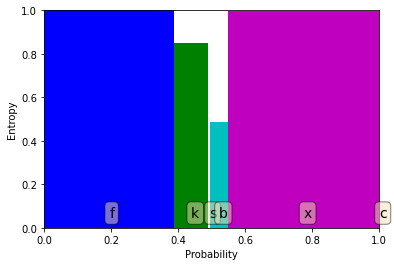

In [12]:
import matplotlib.pyplot as plt

colours = 'bgrcmk'  # An array of colours used during plotting later on.

# feature
def plot_entropy(probability, entropy, labels):
    """Graphical representation of entropy when splitting on each value"""

    # Some complex calculations to get the centre of the bars
    positions = np.array([0])
    positions = np.concatenate((positions, np.cumsum(probability)[:-1]))
    positions += np.divide(probability, 2)

    # Plot bars with colours
    plt.bar(positions, entropy, width=probability, color=colours[:len(probability)])

    # Set limits
    plt.ylim([0, 1])
    plt.xlim([0, 1])

    # Labels
    plt.ylabel("Entropy")
    plt.xlabel("Probability")

    # If labels are provided, plot some text
    if labels:
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        for i, lab in enumerate(labels):
            # Plot text
            plt.text(positions[i], 0.1, lab, fontsize=14, verticalalignment='top', bbox=props)

# Plot for "cap-shape" feature
feature = X["cap-shape"]
# Calculate probabilities and entropies
probs = class_probability(feature, y)
ents = class_entropy(feature, y)
labels = set(feature)
plot_entropy(probs, ents, labels)
plt.show() 

<ipython-input-5-4e0a00f44701>:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)
<ipython-input-12-50ce9f8d5b01>:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(positions, entropy, width=probability, color=colours[:len(probability)])


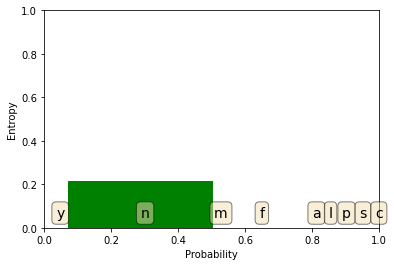

In [16]:
# Plot for "odor" feature
feature = X["odor"]
# print(feature.value_counts())
#     n    3528
#     f    2160
#     s     576
#     y     576
#     a     400
#     l     400
#     p     255
#     c     192
#     m      36
probs = class_probability(feature, y)
ents = class_entropy(feature, y)
labels = set(feature)
plot_entropy(probs, ents, labels)
plt.show()